## Linear Regression using Tensorflow

In this tutorial, we will be raising our standard a bit asince, we understand the basics now. So, let's have a look at Google's Tensorflow and how it can do Linear Regression.

You will be surprised to see that how easy it is to use this tool for anything.

So, let's get started...


### Step-1: Import Dependencies

* numpy: for numerical analysis

* pandas: to read and modify data
 
* tensorflow: Google's library for Machine Learning and Deep Learning

* Matplotlib: to plot the data

In [1]:
# Import Dependencies

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

So, like in all the previous tutorials, the step-2 in this remains the same i.e. Load the Data. Let's do it.

### Step-2: Load Dataset

For this tutorial, I'll be using the Swedish Insurance dataset to show the working or Linear Regression in Tensorflow.

In [2]:
# Load Dataset

df = pd.read_csv('dataset/Insurance-dataset.csv')

In [4]:
# Let's have a look at the data

df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
# Checking if the dataset is balanced or not

df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


It's all ok. So, what's the next step ?? Well, let's seperate the features and labels.

In [6]:
# Training Data

train_X = np.array(df['X'], dtype=np.float64)
train_y = np.array(df['Y'], dtype=np.float64)

### Step-3: Define Parameters

In [12]:
# Let's also define other Training Parameters

learningRate = 0.001        # Learning Rate
iterations = 5000           # Number of Training Iterations
step_size = 50              # Will be used to display log in steps of 50
n = train_X.shape[0]        # Number of Training Samples in a column. 

In [13]:
# Assigning Placeholders for Input Data
# A Placeholder is something in which we input our data at run time i.e. when we run our Tensorflow Session.
# We will be inputting the train_X and train_y data at run time i.e. when we require it for computation.

X = tf.placeholder('float')
Y = tf.placeholder('float')

Next step is to initialize "Weight" i.e. "m" and "Bias" i.e. "b". 

In Tensorflow, when we need to define a variable that has an initial value and we will train during the session to change that value, we define it as a "Variable".

We know that the weights and bias are initialized to either zero or any random value, so we will do this in this tutorial.

According to Tensorflow:

> A variable maintains state in the graph across calls to run(). You add a variable to the graph by constructing an instance of the class Variable.
The Variable() constructor requires an initial value for the variable, which can be a Tensor of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.

In [14]:
# Define Trainable Variables

m = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

Well, now that we have defined all the important components, let's write the equation for the "Hypothesis" or "Prediction".

### y_hat = m*X + b

In [15]:
# Hypothesis
# y_hat = m*X + b

y_hat = tf.add(tf.multiply(m,X),b)

So, we have all the required equations in place. Let's write our Cost Function.


### Step-4: Cost Function

#### J = ((y_hat  -  y) ^ 2 ) / (2*n)


In [16]:
# Cost Function
# J = (y_hat - y) ^ 2 / (2*n)

def costFunction(y_hat, y, samples):
    return tf.reduce_sum(tf.pow(y_hat-y,2))/(2*samples)

So, next step is to define Gradient Descent. Let's do it.

### Step-5: Gradient Descent

In [17]:
# Gradient Descent Optimizer
# Inputs: Learning Rate and Cost from Cost Function
# Aim: To minimize Cost Function

# lr: Learning Rate
# cost: Cost Function Output [J]

def gradientDescent(lr, cost):
    return tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

Well, now that we are all done, let's call our functions and do the training.

### Step-6: Training the Model

In [19]:
# Mean Squared Error / Cost Function
J = costFunction(y_hat, Y, n)

# Gradient Descent Optimizer
gd = gradientDescent(lr=learningRate, cost=J)

Now that we have calles our functions, let's initialize our Tensorflow session and run it.

In [20]:
# Initialize all Variables
init = tf.global_variables_initializer()

Starting Gradient Descent...

Step:  0050 cost:  739.817565918
Step:  0100 cost:  734.175476074
Step:  0150 cost:  728.811523438
Step:  0200 cost:  723.711914062
Step:  0250 cost:  718.863830566
Step:  0300 cost:  714.254638672
Step:  0350 cost:  709.872741699
Step:  0400 cost:  705.706909180
Step:  0450 cost:  701.746398926
Step:  0500 cost:  697.981140137
Step:  0550 cost:  694.401550293
Step:  0600 cost:  690.998413086
Step:  0650 cost:  687.763000488
Step:  0700 cost:  684.687072754
Step:  0750 cost:  681.762817383
Step:  0800 cost:  678.982788086
Step:  0850 cost:  676.339782715
Step:  0900 cost:  673.827026367
Step:  0950 cost:  671.438171387
Step:  1000 cost:  669.167175293
Step:  1050 cost:  667.007934570
Step:  1100 cost:  664.955383301
Step:  1150 cost:  663.003784180
Step:  1200 cost:  661.148559570
Step:  1250 cost:  659.384826660
Step:  1300 cost:  657.707885742
Step:  1350 cost:  656.113647461
Step:  1400 cost:  654.598083496
Step:  1450 cost:  653.157287598
Step:  1500 c

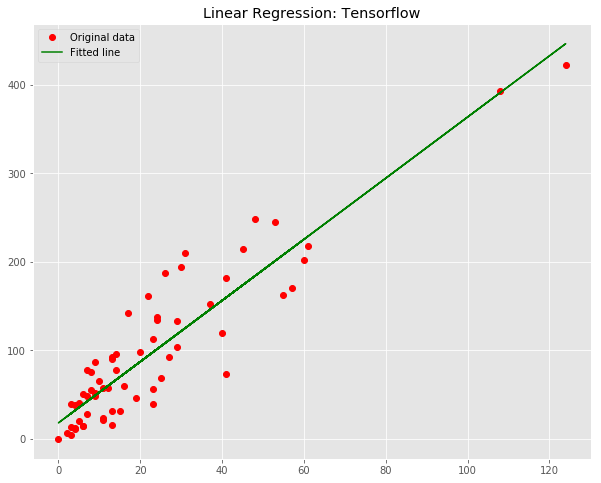

In [41]:
# Launch TF Graph Session
with tf.Session() as sess:
    
    # Initialize Session
    sess.run(init)
    
    print('Starting Gradient Descent...\n')

    # Run Gradient Descent and Minimize Cost
    for iters in range(iterations):
        
        # Do Gradient Descent to find out best values for "m" and "b"
        sess.run(gd, feed_dict={X:train_X, Y:train_y})

        # Print on steps to keep a tract of Cost with each Iteration Step
        if (iters + 1) % step_size == 0:
        
            # Mapping training Values to Placeholders and  Calculate Cost
            c = sess.run(J, feed_dict={X:train_X, Y:train_y})
            print('Step: ', '%04d' % (iters + 1), 'cost: ', '{:.9f}'.format(c))
    
    
    print('\n Finished Optimization...')
    
    training_cost = sess.run(J, feed_dict={X: train_X, Y: train_y})
    
    print("\n Training Cost:", training_cost , " m:", sess.run(m), " b:", sess.run(b), '\n')

    
    # Plot the Best Fit Line
    fig,ax = plt.subplots(figsize=(10,8))
    ax.plot(train_X, train_y, 'ro', label='Original data')    
    ax.plot(train_X, sess.run(m) * train_X + sess.run(b), c='g', label='Fitted line')
    ax.set_title('Linear Regression: Tensorflow')
    plt.legend(loc='best')
    

#### I hope you like this tutorial. For any questions, comments, suggestions, please leave them below. Thanks :)